In [34]:
# import
import numpy as np
import scipy as sp
import timeit
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

**Comparing the time**

In [35]:
start = timeit.timeit()

X = range(1000)

pySum = sum([n*n for n in X])

end = timeit.timeit()

print("Total time taken: ", end-start)

Total time taken:  -0.006912270948305377


** Learning Scipy **

In [36]:
# reading the web data 

data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")
print(data[:3])

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]]


** Preprocessing and Cleaning the data **

In [37]:
X = data[:, 0]
y = data[:, 1]

# checking for nan values
print(sum(np.isnan(X)))
print(sum(np.isnan(y)))

0
8


** Filtering the nan data **

In [38]:
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]

# checking for nan values
print(sum(np.isnan(X)))
print(sum(np.isnan(y)))

0
0


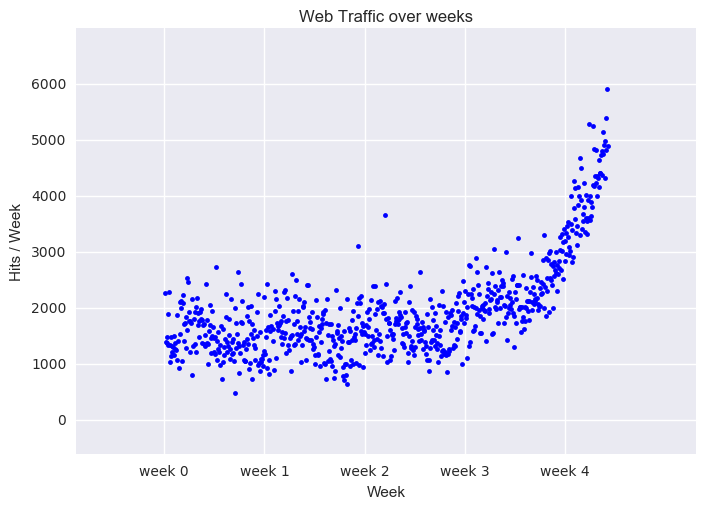

In [58]:
fig, ax = plt.subplots()

ax.plot(X, y, '.b')
ax.margins(0.2)
plt.xticks([w*24*7 for w in range(0, 5)], ["week %d" %w for w in range(0, 5)])
ax.set_xlabel("Week")
ax.set_ylabel("Hits / Week")
ax.set_title("Web Traffic over weeks")

** Choosing the right model and learning algorithm **

In [41]:
# creating a error calc fuction
def error(f, x, y):
    return np.sum((f(x) - y)**2)

In [43]:
# sp's polyfit func do the same
fp1, residuals, rank, sv, rcond = sp.polyfit(X, y, 1, full=True)

print(fp1)
print(residuals)

[   2.59619213  989.02487106]
[  3.17389767e+08]


In [78]:
f1 = sp.poly1d(fp1)

In [46]:
# checking error
error(f1, X, y)

317389767.33977801

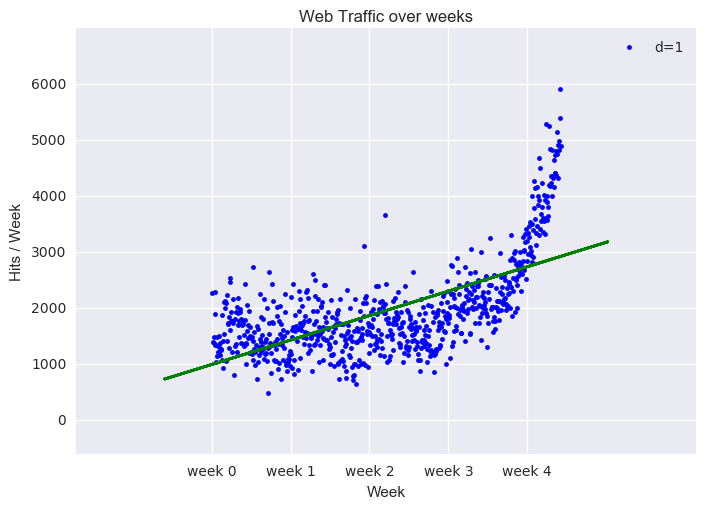

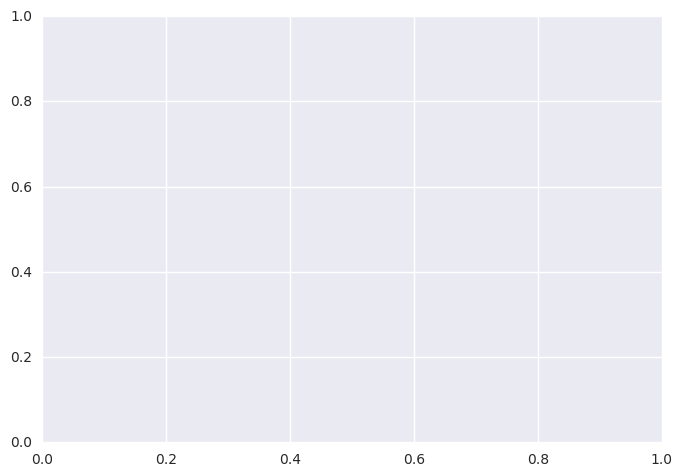

In [81]:
x1 = np.array([-100, np.max(X)+100])
y1 = f1(x1)
ax.plot(x1, y1, c='g')
plt.legend(["d=%i" % f1.order], loc='best')
fig